1) Is momentum still profitable?

In [75]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0,'../cmds')
import portfolio_management_helper as pmh

momentum_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="momentum (excess returns)")
factor_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="factors (excess returns)")
rts_df = pd.concat([momentum_rts, factor_rts], axis=1)
rts_df


,UMD,MKT,SMB,HML
date,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454
1927-02-28,-0.0214,0.0418,0.0004,0.0294
1927-03-31,0.0361,0.0013,-0.0165,-0.0261
1927-04-30,0.0430,0.0046,0.0030,0.0081
1927-05-31,0.0300,0.0544,0.0153,0.0473
...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166
2024-06-30,0.0090,0.0277,-0.0306,-0.0331
2024-07-31,-0.0242,0.0124,0.0680,0.0573


In [76]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1927-2024": ["1927", "2024"],
        "1927-1993": ["1927", "1993"],
        "1994-2008": ["1994", "2008"],
        "2009-2024": ["2009", "2024"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1927-2024,0.0753,0.1625,0.4635,-2.9905,-0.3443,-0.4064
UMD 1927-1993,0.0901,0.1600,0.5630,-3.8082,-0.3625,-0.4950
UMD 1994-2008,0.1044,0.1756,0.5945,-0.5820,-0.2345,-0.1294
UMD 2009-2024,-0.0151,0.1585,-0.0952,-2.6910,-0.3676,-0.3209


Momentum has varied quite a bit during these time periods. From 2009 onwards, its returns have gotten much worse, and its resulting Sharpe ratio. The skewness has varied a lot period over period.

Momentum does have a negative correlation to both the market factor and value factor. Due to that, even if it had zero mean returns, it may be an important tool for diversification.

2) Long Only Implementation

In [77]:
decile_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="size_sorts (total returns)")
rf_rts = pmh.read_excel_default("../data/momentum_data.xlsx", sheet_name="risk-free rate")
excess_decile_rts = pd.concat([decile_rts, rf_rts], axis=1)
excess_decile_rts["UMD Long"] = .5 * (excess_decile_rts["BIG HiPRIOR"] + excess_decile_rts["SMALL HiPRIOR"]) - 	excess_decile_rts["RF"]
long_rts = excess_decile_rts["UMD Long"]
rts_df = pd.concat([rts_df, long_rts], axis=1)
rts_df

,UMD,MKT,SMB,HML,UMD Long
date,,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454,-0.0005
1927-02-28,-0.0214,0.0418,0.0004,0.0294,0.0473
1927-03-31,0.0361,0.0013,-0.0165,-0.0261,-0.0020
1927-04-30,0.0430,0.0046,0.0030,0.0081,0.0232
1927-05-31,0.0300,0.0544,0.0153,0.0473,0.0670
...,...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166,0.0514
2024-06-30,0.0090,0.0277,-0.0306,-0.0331,0.0075
2024-07-31,-0.0242,0.0124,0.0680,0.0573,0.0399


In [78]:
pmh.calc_summary_statistics(
    returns=rts_df,
    annual_factor=12,
    provided_excess_returns=True,
    correlations=True,
    timeframes={
        "1994-2004": ["1994", "2004"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe", "Skewness","Correlations","MKT Correlation","HML Correlation"],
    keep_indexes=["UMD","UMD Long"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1994-2004,0.0982,0.1908,0.5144,-0.6579,-0.2165,-0.0718
UMD Long 1994-2004,0.1413,0.1817,0.7774,-0.3797,0.8507,-0.5446


The long strategy is actually more attractive for Mean, Vol, and Sharpe.

However, the strategy is highly correlated to market premia, which means it lacks diversification. It does have a low correlation to value premia.

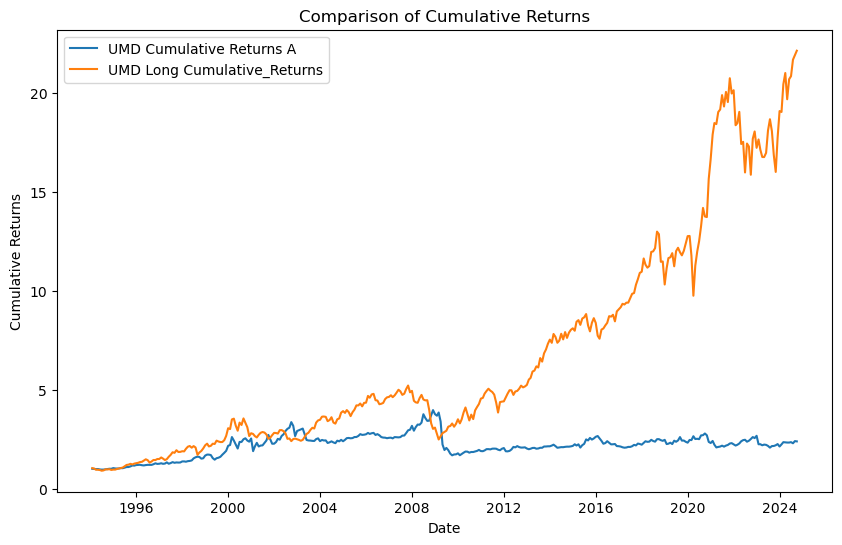

In [82]:
rts_df.index
rts_df_series = rts_df[(rts_df.index.year >= 1994) & (rts_df.index.year <= 2024)]
rts_df_series['UMD Cum'] = (1+rts_df_series['UMD']).cumprod()
rts_df_series['UMD Long Cum'] = (1+rts_df_series['UMD Long']).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(rts_df_series.index, rts_df_series['UMD Cum'], label='UMD Cumulative Returns A')
plt.plot(rts_df_series.index, rts_df_series['UMD Long Cum'], label='UMD Long Cumulative_Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Comparison of Cumulative Returns')
plt.legend()
plt.show()


Is momentum just data mining, or is it a robust strategy?